# Data Analysis and Data Science
## Be curious about the method 

By: FRANCOIS Justine
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [3]:
print("Student Name: FRANCOIS Justine")

Student Name: FRANCOIS Justine


Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [183]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [184]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [186]:
### Import and clean the Gene expression cancer 1 dataset
data = pd.read_csv("gene_expression_cancer_1.csv")
data

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Dead
146,6.3,2.5,5.0,1.9,Dead
147,6.5,3.0,5.2,2.0,Dead
148,6.2,3.4,5.4,2.3,Dead


In [187]:
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

Person correlation -0.10936924995064938


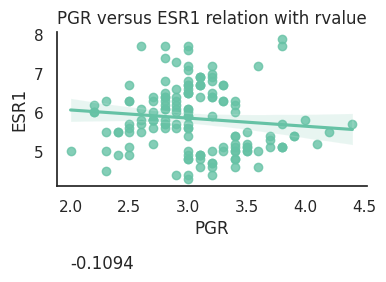

In [188]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.
reg = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative="two-sided")
print("Person correlation", reg.rvalue)

p = sns.regplot(data, x="PGR", y="ESR1")
p.text(2,2, np.round(reg.rvalue,4))
p.set_title("PGR versus ESR1 relation with rvalue")
sns.despine()

In [189]:
#Interprétation : 
print ("Pour les gènes PGR et ESR1,")
print("le coefficient de corrélation de Pearson est approximativement -0.1094.")
print("Ce coefficient étant proche de zéro, cela suggère qu'il n'y a pas de corrélation linéaire significative")
print("entre les niveaux d'expression de ces deux gènes dans cet échantillon de données.")
print("En d'autres termes, les variations dans l'expression du gène PGR ne semblent pas être associées")
print("de manière linéaire aux variations dans l'expression du gène ESR1.")

Pour les gènes PGR et ESR1,
le coefficient de corrélation de Pearson est approximativement -0.1094.
Ce coefficient étant proche de zéro, cela suggère qu'il n'y a pas de corrélation linéaire significative
entre les niveaux d'expression de ces deux gènes dans cet échantillon de données.
En d'autres termes, les variations dans l'expression du gène PGR ne semblent pas être associées
de manière linéaire aux variations dans l'expression du gène ESR1.


### Grouped correlations [14 pts]

In [ ]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).

In [190]:
subset_KM = data.PGR, data.ESR1
subset_KM = data.loc[:,["PGR","ESR1"]]
subset_KM.head()
kmean_algo = sklearn.cluster.KMeans(n_clusters=3, n_init="auto")
kmeans_subset = kmean_algo.fit(subset_KM)
print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T
cent_by_axes[0]

[[2.7        5.8       ]
 [3.07826087 6.82391304]
 [3.4        5.00392157]]


array([2.7       , 3.07826087, 3.4       ])

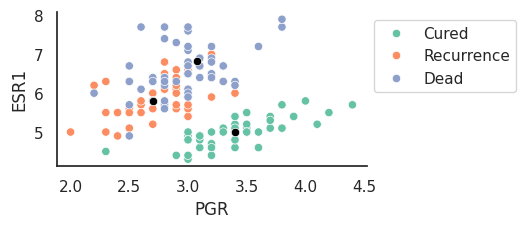

In [191]:
p = sns.scatterplot(data, x="PGR", y="ESR1", hue="Results")
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[1], color="black")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

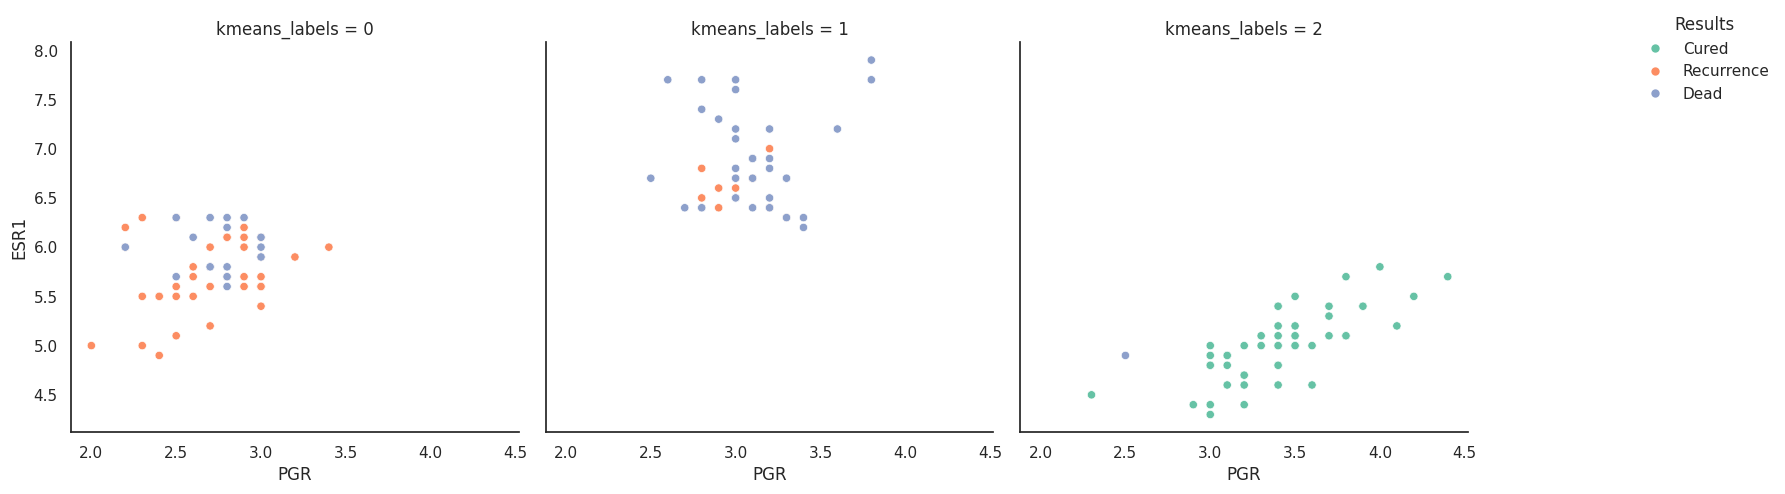

Corrélation de Pearson globale : -0.1094
Corrélation de Pearson pour le groupe k-means 0: 0.2804
Corrélation de Pearson pour le groupe k-means 1: 0.1067
Corrélation de Pearson pour le groupe k-means 2: 0.7199


In [196]:
data["kmeans_labels"] = kmeans_subset.labels_
p = sns.relplot(data=data, x="PGR", y="ESR1", hue="Results", col="kmeans_labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

pearson_global = data[["PGR", "ESR1"]].corr(method='pearson').iloc[0, 1]
print(f"Corrélation de Pearson globale : {pearson_global:.4f}")
for label, group in data.groupby("kmeans_labels"):
    pearson_corr = group[["PGR", "ESR1"]].corr(method='pearson').iloc[0, 1]
    print(f"Corrélation de Pearson pour le groupe k-means {label}: {pearson_corr:.4f}")

In [3]:
#Interprétation : 
print ("Les résultats des corrélations de Pearson indiquent que globalement,")
print("il y a une très faible corrélation négative entre les variables (-0.1094).")
print("Cependant, en analysant les groupes k-means séparément, le groupe k-means 2 montre une forte corrélation positive")
print("(0.7199), tandis que les groupes k-means 0 et 1 présentent des corrélations faibles à modérées (0.2804 et 0.1067")
print("respectivement). Cela suggère que la relation entre les variables est beaucoup plus forte dans le groupe k-means 2")
print("par rapport aux autres groupes.")

Les résultats des corrélations de Pearson indiquent que globalement,
il y a une très faible corrélation négative entre les variables (-0.1094).
Cependant, en analysant les groupes k-means séparément, le groupe k-means 2 montre une forte corrélation positive
(0.7199), tandis que les groupes k-means 0 et 1 présentent des corrélations faibles à modérées (0.2804 et 0.1067
respectivement). Cela suggère que la relation entre les variables est beaucoup plus forte dans le groupe k-means 2
par rapport aux autres groupes.


### Spearman's rank correlation [5 pts]

In [194]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
import scipy.stats as sp

spearman_global = sp.spearmanr(data.PGR, data.ESR1)
print(f"Corrélation de Spearman pour les données globales: {spearman_global.correlation:.4f}, p-value: {spearman_global.pvalue:.4f}")

for label in range(3):
    group = data[data["kmeans_labels"] == label]
    spearman_corr = sp.spearmanr(group["PGR"], group["ESR1"])
    print(f"Corrélation de Spearman pour les groupes k-means {label}: {spearman_corr.correlation:.4f}, p-value: {spearman_corr.pvalue:.4f}")

Corrélation de Spearman pour les données globales: -0.1595, p-value: 0.0513
Corrélation de Spearman pour les groupes k-means 0: 0.2104, p-value: 0.1305
Corrélation de Spearman pour les groupes k-means 1: -0.0637, p-value: 0.6742
Corrélation de Spearman pour les groupes k-means 2: 0.7614, p-value: 0.0000


In [2]:
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.
print("Les résultats montrent une forte corrélation positive significative dans le groupe k-means 2")
print("Spearman: 0.7614, Pearson: 0.7199), indiquant une relation robuste entre les variables dans ce groupe.")
print("En revanche, les corrélations dans les autres groupes et globalement sont faibles et non significatives,")
print("suggérant une absence de relation claire dans ces cas.")

Les résultats montrent une forte corrélation positive significative dans le groupe k-means 2
Spearman: 0.7614, Pearson: 0.7199), indiquant une relation robuste entre les variables dans ce groupe.
En revanche, les corrélations dans les autres groupes et globalement sont faibles et non significatives,
suggérant une absence de relation claire dans ces cas.
